#                                             ** PREDICTIVE SOIL MOISTURE MODELING**

# **Problem Statement: Optimizing Water Usage & Crop Yield**

**1.Soil Moisture Trends**





Analyze historical soil moisture data to identify patterns and trends over time, considering seasonal variations and other environmental factors.

**2.Soil Moisture Correlations**

Explore the relationship between soil moisture levels and key environmental factors like temperature, humidity, and precipitation to understand their influence on soil moisture fluctuations.

**3.Predictive Modeling**

Build a predictive model that leverages these correlations to forecast future soil moisture levels, enabling proactive management strategies.

**4.Data-Driven Decisions**

Provide farmers and agronomists with real-time insights to make informed decisions about irrigation, crop selection, and land management practices.

## Content

1. **Import Packages**
2. **Read Data**
3. **Understand and Prepare the Data**
    - 3.1 - Data Types and Dimensions
    - 3.2 - Feature Engineering
4. **Splitting and training the data**
    - 4.1 - Prepare the Data
    - 4.2 - Scale the Data
    - 4.3 - Machine learning algorithms
5. **Deep learning technique:RNN using LSTM**
6. **Conclusion**









## PREDICTIVE SOIL MOISTURE MODELING

**Import Packages**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Read Data- SOIL MOISTURE.CSV**

In [ ]:
df=pd.read_csv("/content/Soil Moisture.csv")
df

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25
...,...,...,...,...,...,...,...,...,...,...
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36


### **Understand and Prepare the Data**

**Data Types and Dimensions**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ttime   20166 non-null  object 
 1   pm1     20166 non-null  float64
 2   pm2     20166 non-null  float64
 3   pm3     20166 non-null  float64
 4   am      20166 non-null  float64
 5   sm      20166 non-null  float64
 6   lum     20166 non-null  float64
 7   temp    20166 non-null  float64
 8   humd    20166 non-null  float64
 9   pres    20166 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
count,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000
mean,1.585495,2.581223,59.172185,0.729346,4339.095656,2891.423039,22.625972,78.329035,93154.619405
std,1.045641,1.288723,28.166706,1.795355,3077.733911,4277.275782,4.666760,24.007034,290.963485
min,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,8.610000,13.320000,92352.450000
25%,0.550000,1.670000,36.880000,0.000000,465.250000,2.000000,20.000000,61.690000,92976.272500
50%,1.110000,2.230000,51.400000,0.000000,6410.000000,165.500000,21.430000,88.220000,93152.930000
75%,2.230000,3.350000,77.110000,0.000000,7042.000000,5275.000000,26.110000,100.000000,93350.997500
max,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000,36.880000,100.000000,94042.780000


In [ ]:
df.isnull().sum()

,0
ttime,0
pm1,0
pm2,0
pm3,0
am,0
sm,0
lum,0
temp,0
humd,0
pres,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(20166, 10)

In [ ]:
df.head(5)

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25


In [ ]:
df.tail(5)

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36
20165,2023-03-10 10:51:14,1.11,1.67,27.93,2.4,328.0,8954.0,32.68,20.85,93541.99


In [ ]:
df.nunique()

,0
ttime,20166
pm1,20
pm2,17
pm3,224
am,23
sm,924
lum,6707
temp,1979
humd,6346
pres,17581


In [ ]:
df.isna().sum()

,0
ttime,0
pm1,0
pm2,0
pm3,0
am,0
sm,0
lum,0
temp,0
humd,0
pres,0


**VISUALIZATION USING MATPLOTLIB AND SEABORN**

<Axes: xlabel='sm'>

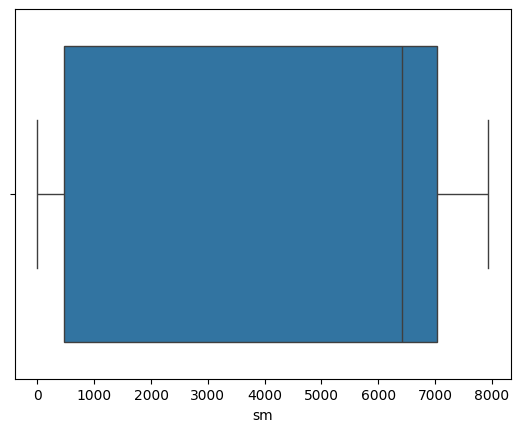

In [ ]:
sns.boxplot(x='sm',data=df)

<Axes: xlabel='sm', ylabel='Count'>

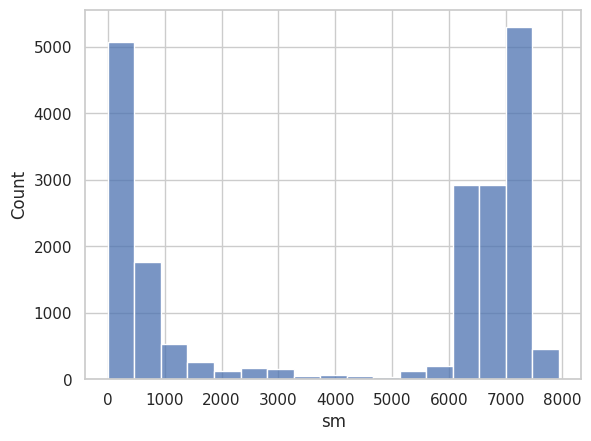

In [ ]:
sns.histplot(df['sm'])

In [ ]:
df['ttime'] = pd.to_datetime(df['ttime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ttime   20166 non-null  datetime64[ns]
 1   pm1     20166 non-null  float64       
 2   pm2     20166 non-null  float64       
 3   pm3     20166 non-null  float64       
 4   am      20166 non-null  float64       
 5   sm      20166 non-null  float64       
 6   lum     20166 non-null  float64       
 7   temp    20166 non-null  float64       
 8   humd    20166 non-null  float64       
 9   pres    20166 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.5 MB


In [ ]:
df1=df.copy()

In [ ]:
df1.drop('ttime',axis=1,inplace=True)

**Feature Engineering**

<Axes: >

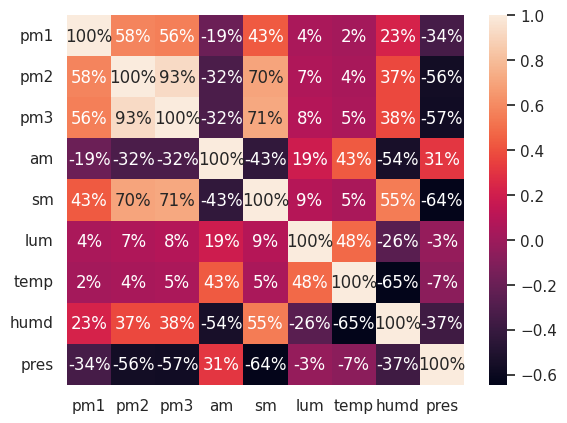

In [ ]:
sns.heatmap(df1.corr(),annot=True,fmt='.0%')

**SPLITTING AND TRAINING DATA**

In [ ]:
features = df.drop(['ttime', 'sm'], axis=1)
target = df['sm']

** Prepare the Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.20,random_state=13)

In [ ]:
X_train.shape

(16132, 8)

In [ ]:
X_test.shape

(4034, 8)

In [ ]:
Y_train.shape

(16132,)

In [ ]:
Y_test.shape

(4034,)

**Scale the Data**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.99275092,  0.15772902,  0.01858076, ..., -0.52108246,
         0.90513212, -0.71487023],
       [-0.4586925 , -0.7061756 , -1.0670305 , ...,  2.61591514,
        -2.52277922,  0.77231397],
       [-0.99275092, -1.13812791, -1.04725358, ..., -1.89084775,
        -0.17075442,  1.34224195],
       ...,
       [ 0.07536592,  0.15772902,  0.37350572, ...,  1.05596402,
        -0.39256533,  0.25198963],
       [ 3.2701797 ,  2.30977713,  2.44584368, ...,  0.69909849,
        -0.33203375, -0.04864679],
       [ 0.07536592, -0.7061756 , -0.79050687, ..., -0.43560568,
         0.90513212,  0.60233245]])

In [ ]:
X_test

array([[ 0.60942435,  0.15772902,  0.01858076, ...,  1.61156305,
        -0.80923815, -0.90033576],
       [-0.99275092, -1.13812791, -1.00769976, ..., -0.00181106,
        -0.72383059,  0.45146613],
       [-0.99275092, -0.27422329, -0.37625118, ..., -0.62792842,
         0.90513212, -0.09246105],
       ...,
       [ 0.60942435,  0.15772902,  0.17644291, ...,  1.24401292,
        -0.33286295, -0.41159605],
       [-0.99275092,  0.15772902,  0.17644291, ...,  0.15632097,
         0.39102834, -0.07108489],
       [-0.99275092, -0.27422329, -0.27771977, ..., -0.65143454,
         0.90513212,  0.15415262]])

In [ ]:
Y_train

,sm
8198,7246.0
19603,332.0
18710,337.0
3608,7143.0
13442,917.0
...,...
11284,6410.0
11964,6757.0
5390,7143.0
860,7463.0


In [ ]:
Y_test

,sm
7821,7143.0
17832,347.0
10815,6250.0
9926,1984.0
4699,7143.0
...,...
10821,6250.0
9167,7042.0
7144,6944.0
6409,6098.0


**Machine Learning Algorithms**

In [ ]:
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pred1=model1.predict(X_test)
pred1

array([-1039.40961101,  4906.70763217,  -688.92392199, ...,
        6445.25216159,  1645.66242414, -1293.03511711])

In [ ]:
from sklearn.metrics import r2_score
rscore1=r2_score(Y_test,pred1)
print("R-squared:",rscore1)

R-squared: 0.7314403502018669


In [ ]:
import xgboost as xgb
model2=xgb.XGBRegressor()
model2.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred2=model2.predict(X_test)
pred2

array([ 345.66458, 2828.711  ,  217.34964, ..., 7225.536  ,  312.068  ,
        330.9777 ], dtype=float32)

In [ ]:
from sklearn.metrics import r2_score
rscore2=r2_score(Y_test,pred2)
print("R-squared:",rscore2)

R-squared: 0.981240127636683


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(X_train, Y_train)
pred3=model3.predict(X_test)
print(pred3)
from sklearn.metrics import r2_score
rscore3=r2_score(Y_test,pred3)
print("R-squared:",rscore3)


[ 344. 5495.  330. ... 7246.  343.  333.]
R-squared: 0.9663067933689717


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=100,
                                  random_state=42)
model4.fit(X_train, Y_train)
pred4=model4.predict(X_test)
print(pred4)
from sklearn.metrics import r2_score
r4=r2_score(Y_test,pred4)
print("R-squared:",r4)


[ 343.83 3192.24  330.47 ... 7245.25  341.42  333.32]
R-squared: 0.9829327188693717


In [ ]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train, Y_train)
pred5=model5.predict(X_test)
print(pred5)
from sklearn.metrics import r2_score
rscore5=r2_score(Y_test,pred5)
print("R-squared:",rscore5)


[ 346. 1961.  331. ... 7143.  341.  337.]
R-squared: 0.6901936032700706


***DEEP LEARNING TECHNIQUE: RNN USING LSTM ***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

datetime_column = df['ttime']

numerical_df = df.drop('ttime',axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numerical_df)

scaled_df = pd.concat([datetime_column, pd.DataFrame(scaled_data)], axis=1)

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

n_steps = 60

X, y = create_sequences(scaled_data, n_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()


model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))


model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - loss: 0.0320 - val_loss: 0.0127
Epoch 2/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - loss: 0.0137 - val_loss: 0.0113
Epoch 3/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - loss: 0.0121 - val_loss: 0.0101
Epoch 4/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0108 - val_loss: 0.0086
Epoch 5/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 0.0091 - val_loss: 0.0081
Epoch 6/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 40s 92ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 7/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0083 - val_loss: 0.0064
Epoch 8/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0069 - val_loss: 0.0058
Epoch 9/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 10/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 11/60
403/403 ━━━━━━━━━━━━━━━━━━━━ 38s 94ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 12/60
403/403 ━━━━━━━━━

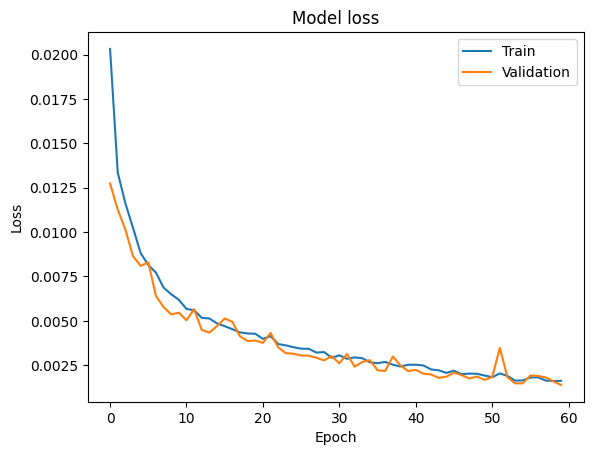

In [ ]:
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_test_scaled = y_test.reshape(-1, 1)
y_pred_scaled = y_pred.reshape(-1, 1)

y_test_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_test_scaled), axis=1))[:, -1]
y_pred_actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred_scaled), axis=1))[:, -1]


126/126 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0013279717630091251
R-squared: 0.9553746991639065


In [ ]:
features = df[['pm1', 'pm2', 'pm3', 'am', 'lum', 'temp', 'humd', 'pres']].values
target = df['sm'].values


LINEAR AUTO REGRESSIVE MODEL

Mean Squared Error (MSE): 64.79276437471245
Root Mean Squared Error (RMSE): 8.049395280063742


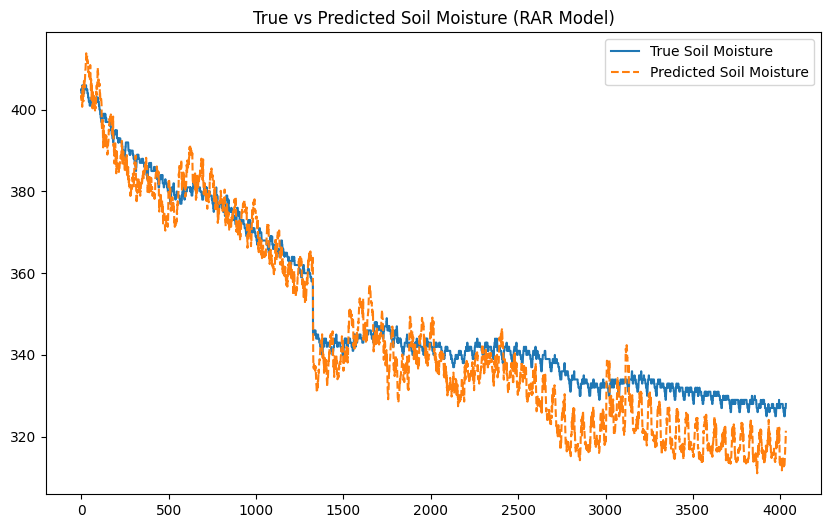

In [ ]:
def create_lagged_features(features, target, lag=3):
    X, y = [], []
    for i in range(lag, len(target)):

        lagged_sm = target[i-lag:i]
        current_features = features[i]
        X.append(np.concatenate([lagged_sm, current_features]))
        y.append(target[i])
    return np.array(X), np.array(y)

lag = 3
X, y = create_lagged_features(features, target, lag)

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model_rar = LinearRegression()
model_rar.fit(X_train, y_train)

yrar_pred = model_rar.predict(X_test)

mse = mean_squared_error(y_test, yrar_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Soil Moisture')
plt.plot(y_pred, label='Predicted Soil Moisture', linestyle='dashed')
plt.title('True vs Predicted Soil Moisture (RAR Model)')
plt.legend()
plt.show()

In [ ]:
r2 = r2_score(y_test, yrar_pred)
print("R-squared:", r2)

R-squared: 0.8645842625573756


**Conclusion**

<ipython-input-13-a157b91c330c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette="viridis")


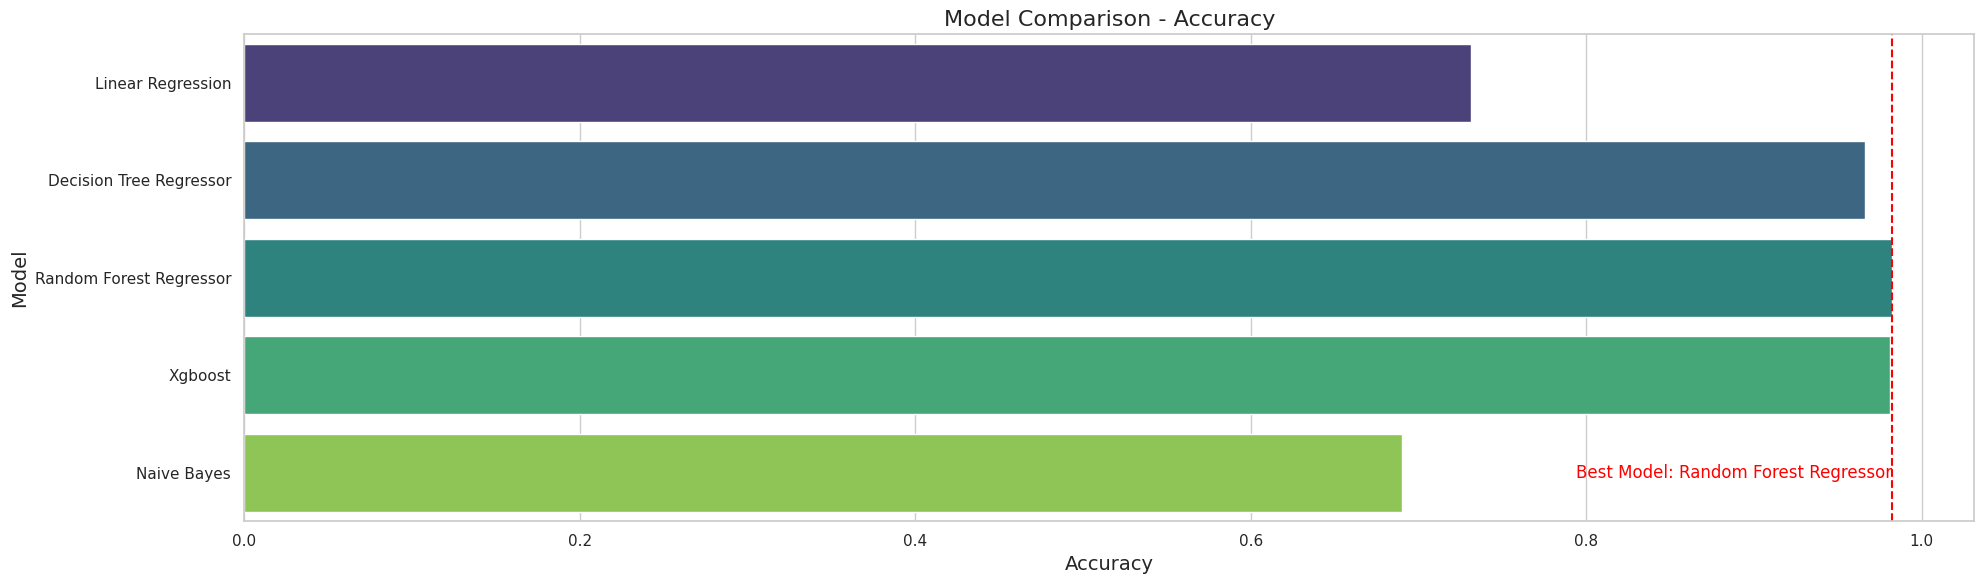

In [ ]:
model_results = {
    'Linear Regression': 0.731,
    'Decision Tree Regressor': 0.966,
    'Random Forest Regressor': 0.982,
    'Xgboost':0.981,
    'Naive Bayes': 0.69
}

sns.set(style="whitegrid")
models = list(model_results.keys())
accuracies = list(model_results.values())


plt.figure(figsize=(20, 6))
sns.barplot(x=accuracies, y=models, palette="viridis")

plt.title("Model Comparison - Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)


best_model = max(model_results, key=model_results.get)
best_score = model_results[best_model]
plt.axvline(best_score, color='red', linestyle='--')
plt.text(best_score, len(models) - 1, f'Best Model: {best_model}', color='red', va='center', ha='right', fontsize=12)

plt.tight_layout()
plt.show()

In this soil moisture prediction project, we explored various machine learning and deep learning models to achieve accurate predictions.
We found that Random Forest Regressor and Xgboost models performed remarkably well, achieving R-squared values close to 0.98, indicating a strong fit to the data.

<ipython-input-15-7f3dccb0af04>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['LSTM', 'Linear AR model'], y=[lstm_results[0], rar_results[0]], palette="viridis")
<ipython-input-15-7f3dccb0af04>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['LSTM', 'Linear AR model'], y=[lstm_results[1], rar_results[1]], palette="viridis")


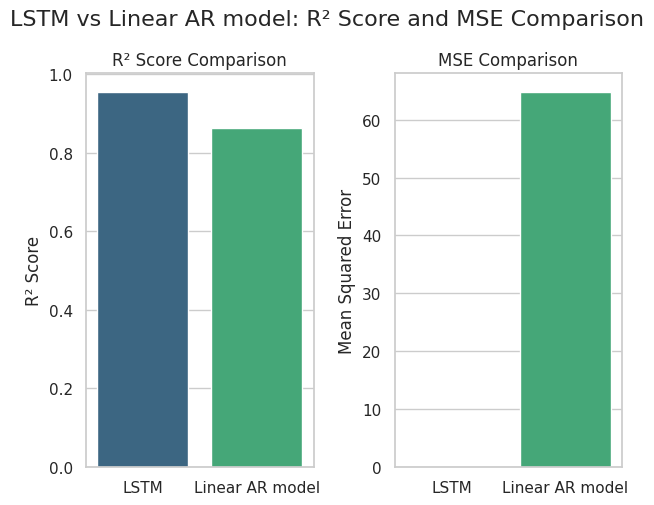

In [ ]:
model_results = {
    'LSTM': {
        'R2 Score': 0.955,'MSE': 0.001
    },
    'RAR': {
        'R2 Score': 0.864,'MSE': 64.79
    }
}


metrics = list(model_results['LSTM'].keys())
lstm_results = list(model_results['LSTM'].values())
rar_results = list(model_results['RAR'].values())


sns.set(style="whitegrid")


plt.subplot(1, 2, 1)
sns.barplot(x=['LSTM', 'Linear AR model'], y=[lstm_results[0], rar_results[0]], palette="viridis")
plt.title('R² Score Comparison')
plt.ylabel('R² Score')


plt.subplot(1, 2, 2)
sns.barplot(x=['LSTM', 'Linear AR model'], y=[lstm_results[1], rar_results[1]], palette="viridis")
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.suptitle('LSTM vs Linear AR model: R² Score and MSE Comparison', fontsize=16, y=1.05)
plt.show()

Time Series Models:
For time series prediction, we implemented LSTM (Long Short-Term Memory) and Linear Autoregressive (LAR) models.
LSTM demonstrated a strong performance with an R-squared value of 0.955 and a low Mean Squared Error (MSE) of 0.001.
This suggests that LSTM effectively captured the temporal dependencies within the data, leading to accurate predictions.
The LAR model also showed decent performance with an R-squared of 0.864 and an MSE of 64.79.
However, LSTM outperformed LAR in terms of both R-squared and MSE, demonstrating its superior ability to model time series data in this context.

Overall Conclusion:
The results indicate that Random Forest Regressor and Xgboost are highly effective for predicting soil moisture based on the given features.
LSTM demonstrated its capability for time series prediction, achieving a high level of accuracy.
The choice of the best model depends on the specific needs and priorities of the application.
For instance, if the focus is on capturing temporal dependencies, LSTM is a strong choice.
If the primary goal is achieving high accuracy with a simpler model, Random Forest Regressor or Xgboost might be preferred.